In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pyMRI.pymri as pymri
import pandas as pd
from pyMRI.utils import RMSE

In [2]:
rerun = False
filename_end = ""
folder_name = "files/"

In [3]:
metabolites = pymri.METABOLITES
met_i = 1

t0, tn, dt, B0 = pymri.setup_sim_t(0.0, 1.0, 2048, 3.0)

ws, t2s, M_0s = pymri.unpack_metabolites(metabolites, B0)
ws, t2s, M_0s = ws[met_i - 1:met_i], t2s[met_i - 1:met_i], M_0s[met_i - 1:met_i]
print(ws, t2s, M_0s)

spins_phi = np.zeros_like(M_0s)

rcond = 1e-7 
zero_filtering = 1e-14

print( "All frequencies are captured by the sampling rate." if pymri.check_frequency(ws, dt) == True 
      else f"At least one frequency is NOT captured by the sampling rate")


[2355.21183064] [0.0199] [0.2917]
All frequencies are captured by the sampling rate.


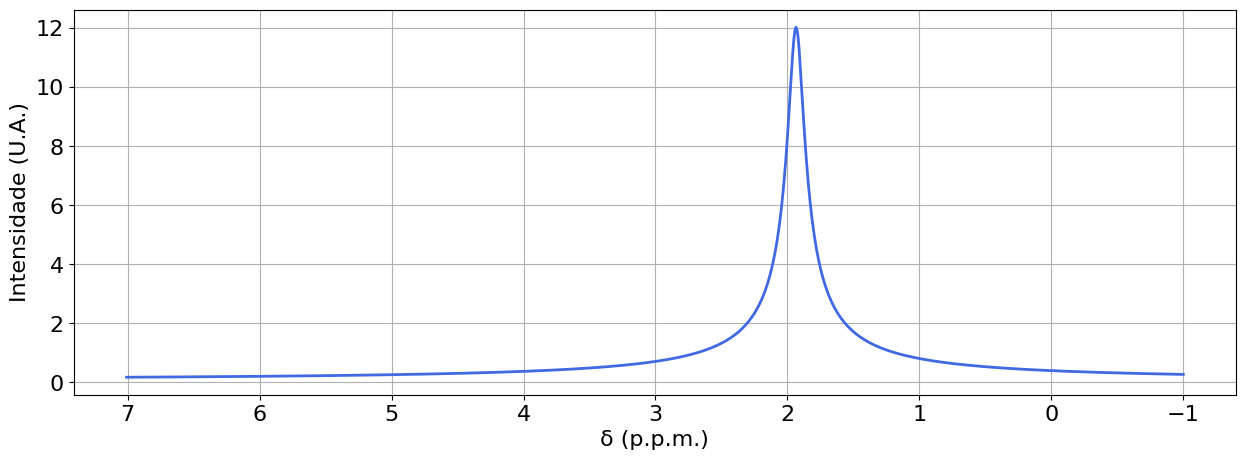

In [6]:
pop = pymri.population(ws, t2s, M_0s, spins_phi)

sig, t = pymri.population_transverse_decay( t0, tn, dt, pop, np.array([]) )
freqs, sig_fft = pymri.fourier_spectrum( sig, dt, B0 )

plt.figure(figsize=(15, 5))
plt.rcParams.update({'font.size': 16})

pymri.plot_chem_shifts( freqs, sig_fft, 1.0, c = "royalblue", linewidth=2, title = None, ylabel="Intensidade (U.A.)")

In [ ]:
L = 0.4
noise_threshold = 30

In [6]:
reconstructed_sig, z, r = pymri.filter_sig(sig, L, noise_threshold, return_poles_and_res=True, return_full_arrays=True)

In [8]:
s0, phi, omega, alpha = pymri.calculate_variables_from_z_and_r(z, r, dt)
t2 = 1/alpha